0. Verify the labels and the formats
1. investigate exisiting distribution of the different labels, how imbalanced they are.
    1.1 Functions to make the descriptive statistics for the classes (each label) with visualizations
    1.2 collect statistics and visualizations
    1.3 decide on thresholds to be used as inputs for splitting functions
2. Data splitting functions given some thresholds based on the distrubtions in point 1
    2.1 fix the seed 
    2.2 handle input thresholds and produce required splits

### To discuss:
* Consider a comment relevant if it contains at least one relevant sentence
* Comments with no relevant sentences are held out, then distributed over the splits in the end.
* Do we need to make sure that each split contains data from each annotator?
* NaNs for non relevant sentences, remove or not? remove = insert -1 or a similar value
* currently the split is on entity-attribute pair, any other ideas? restricting it more will result in more combinations and less representation of each combination



In [118]:
!ls ./data/

abilasha_annotated.csv	hannah_annotated.csv  sarthak_annotated.csv
felix_annotated.csv	kamal_annotated.csv   sebastian_annotated.csv
florian_annotated.csv	omar_annotated.csv    sumit_annotated.csv


In [119]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
header_columns = 'Author_ID|Author_name|Comment_number|Sentence_number|Domain_Relevance|Sentiment|Entity|Attribute|Sentence|Source_file'.split('|')

In [120]:
domain_relevance_classes = ['0', '9']
entity_classes = ['g', 'p', 'f', 'c', 'cg', 'cp', 'cf', 'cc', 'gg']
attribute_classes = ['g', 'p', 't', 'q', 's', 'h', 'c', 'll', 'or', 'l', 'av', 'e', 'a', 'pp']
sentiment_classes = ['p', 'n', '0']
print(len(attribute_classes) * len(entity_classes))

126


In [121]:
files_list = glob('./data/*.csv')

In [122]:
files_list.sort()
print(files_list)

['./data/abilasha_annotated.csv', './data/felix_annotated.csv', './data/florian_annotated.csv', './data/hannah_annotated.csv', './data/kamal_annotated.csv', './data/omar_annotated.csv', './data/sarthak_annotated.csv', './data/sebastian_annotated.csv', './data/sumit_annotated.csv']


In [123]:
def verify_labels(df,
                  domain_relevance_classes=domain_relevance_classes,
                  sentiment_classes=sentiment_classes,
                  entity_classes=entity_classes,
                  attribute_classes=attribute_classes):
    
    
    # impute nans and cast to int
    df.Domain_Relevance.astype(str, inplace=True)
    df.Domain_Relevance.fillna('0', inplace=True)
    df.loc[df.Domain_Relevance.apply(lambda x: x not in ['9', '9.0', '0', '0.0']), 'Domain_Relevance'] = '9'
    df.Domain_Relevance = df.Domain_Relevance.astype(np.int8)
    
    # verfiy domain relevance
    dr_check = np.sum(df.Domain_Relevance.astype(str).str.strip().apply(lambda x: x in domain_relevance_classes))/df.shape[0]

    # verify sentiment 
    dr_df = df[df.Domain_Relevance == 9]
    sent_check = np.sum(dr_df.Sentiment.str.strip().apply(lambda x: x in sentiment_classes))/dr_df.shape[0]
    
    # verify entity
    entity_check = np.sum(dr_df.Entity.str.strip().apply(lambda x: x in entity_classes))/dr_df.shape[0]
    
    # verify attribute
    attrib_check = np.sum(dr_df.Attribute.str.strip().apply(lambda x: x in attribute_classes))/dr_df.shape[0]
    
    if (dr_check and sent_check and entity_check and attrib_check):
        df['Aspect'] = df.Entity.str.strip() + '-' + df.Attribute.str.strip()
        return True
    print(str(dr_check) + ' ' + str(sent_check) + ' ' + str(entity_check) + ' ' + str(attrib_check))
    return False
    

In [124]:
# hannah --> ask her to save the file in a new format (xlsx)
df = pd.read_csv(files_list[3], sep='|', names=header_columns, header=0)
print(files_list[3])
print(verify_labels(df))

./data/hannah_annotated.csv
True


In [125]:
df_list = []
# abilasha -->  impute Nan in domain relevance with 0, no header
df_abilasha = pd.read_csv(files_list[0], sep='|', header=-1, names=header_columns)
print(files_list[0])
print(verify_labels(df_abilasha))
df_list.append(df_abilasha)

# felix --> impute Nan in domain relevance with 0
df_felix = pd.read_csv(files_list[1], sep='|')
print(files_list[1])
print(verify_labels(df_felix))
df_list.append(df_felix)

# florian --> impute Nan in domain relevance with 0, different separator
df_florian = pd.read_csv(files_list[2], sep=';')
print(files_list[2])
print(verify_labels(df_florian))
df_list.append(df_florian)

# hannah --> ask her to save the file in a new format (xlsx)
df_hannah = pd.read_csv(files_list[3], sep='|', names=header_columns, header=0)
print(files_list[3])
print(verify_labels(df_hannah))
df_list.append(df_hannah)

# kamal --> no header, impute Nan in domain relevance with 0
df_kamal = pd.read_csv(files_list[4], sep='|', header=-1, names=header_columns)
print(files_list[4])
print(verify_labels(df_kamal))
df_list.append(df_kamal)

# omar -->
df_omar = pd.read_csv(files_list[5], sep='|')
print(files_list[5])
print(verify_labels(df_omar))
df_list.append(df_omar)

# sarthak --> impute Nan in domain relevance with 0, no header
df_sarthak = pd.read_csv(files_list[6], sep='|', header=-1, names=header_columns)
print(files_list[6])
print(verify_labels(df_sarthak))
df_list.append(df_sarthak)

# sebastian --> impute Nan in domain relevance with 0, wrong header
df_sebastian = pd.read_csv(files_list[7], sep='|', names=header_columns, header=0)
print(files_list[7])
print(verify_labels(df_sebastian))
df_list.append(df_sebastian)

# sumit --> impute Nan in domain relevance with 0
df_sumit = pd.read_csv(files_list[8], sep='|')
print(files_list[8])
print(verify_labels(df_sumit))
df_list.append(df_sumit)

./data/abilasha_annotated.csv
True
./data/felix_annotated.csv
True
./data/florian_annotated.csv
True
./data/hannah_annotated.csv
True
./data/kamal_annotated.csv
True
./data/omar_annotated.csv
True
./data/sarthak_annotated.csv
True
./data/sebastian_annotated.csv
True
./data/sumit_annotated.csv
True


In [126]:
def combine_all_dataframes(dfs):
    return pd.concat(dfs).reset_index()

all_df = combine_all_dataframes(df_list)

# check for the row count of all dataframes
print("Merged dataframe row count: ", all_df.shape[0] == np.sum([df.shape[0] for df in df_list]))
print("Average sentences per person: ", all_df.shape[0] // len(df_list))
all_df.sample(10)

Merged dataframe row count:  True
Average sentences per person:  1055


,index,Author_ID,Author_name,Comment_number,Sentence_number,Domain_Relevance,Sentiment,Entity,Attribute,Sentence,Source_file,Aspect
1997,959,Dan-Parmenter-2,Dan Parmenter,1741.0,1.0,0,NaN,NaN,NaN,You are absolutely right that certification is...,quora.json,NaN
6195,841,Philip-Bowles-1,Philip Bowles,1626.0,5.0,9,n,f,c,"Organic farmers still use poisons, however.",quora.json,f-c
4420,68,Deirdre-Beecher,Deirdre Beecher,782.0,8.0,9,0,c,g,"(There are some exceptions to this, Manuka hon...",quora.json,c-g
8277,888,Sajan-Variar,Sajan Variar,1039.0,5.0,0,NaN,NaN,NaN,You can reach at 910 892 0231.,quora.json,NaN
3374,199,Fred-Lessinput,Fred Lessinput,22.0,6.0,9,p,p,q,The soil they are grown in is richer with biod...,quora.json,p-q
8489,61,Eric-Pepke,Eric Pepke,523.0,5.0,0,NaN,NaN,NaN,"However, there are complications.",quora.json,NaN
1072,34,Ray-Schilling,Ray Schilling,1660.0,33.0,0,NaN,NaN,NaN,I belong to this group.,quora.json,NaN
174,174,Aniruddha-Banerjee,Aniruddha Banerjee,1790.0,5.0,0,NaN,NaN,NaN,fertilizers synthesised from ammonia and other...,quora.json,NaN
5328,976,Mick-Stute,Mick Stute,893.0,20.0,0,NaN,NaN,NaN,"That wording might even be ""made with 100% can...",quora.json,NaN
7863,474,Tia-Eleanor-Bravery,Tia Eleanor Bravery,973.0,1.0,0,NaN,NaN,NaN,Ask for a growers certification.,quora.json,NaN


In [127]:
all_df.to_csv('raw_combined_data.csv', sep='|', index=False, encoding='utf-8')

In [128]:
saved_all_df = pd.read_csv('raw_combined_data.csv', sep='|', encoding='utf-8')
# df = all_df

In [129]:
def domin_relevance_distribution(df):
    
    # domain relevance
    domain_relevant_sentence_count = df.Domain_Relevance.value_counts()[0]
    domain_irrelevant_sentence_count = df.Domain_Relevance.value_counts()[9]
    total_sentence_count = domain_relevant_sentence_count + domain_irrelevant_sentence_count
    domain_relevant_ratio = domain_relevant_sentence_count/total_sentence_count
    domain_irrelevant_ratio = domain_irrelevant_sentence_count/total_sentence_count
    labels = ['Domain-Relevant', 'Domain-Irrelevant']
    sizes = [domain_relevant_ratio, domain_irrelevant_ratio]
    colors = ['yellowgreen', 'gold']
    patches, texts, _ = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Relevance Distribution')
    plt.show()
    
# domin_relevance_distribution(df)

In [130]:
def sentiment_distribution(df):
    # sentiment distribution
    neutral_sentiment_count = df.Sentiment.str.strip().value_counts()['0']
    positive_sentiment_count = df.Sentiment.str.strip().value_counts()['p']
    negative_sentiment_count = df.Sentiment.str.strip().value_counts()['n']
    total_sentence_count = neutral_sentiment_count + positive_sentiment_count + negative_sentiment_count
    neutral_ratio = neutral_sentiment_count/total_sentence_count
    positive_ratio = positive_sentiment_count/total_sentence_count
    negative_ratio = negative_sentiment_count/total_sentence_count
    
    labels = ['Neutral', 'Positive', 'Negative']
    sizes = [neutral_ratio, positive_ratio, negative_ratio]
    colors = ['yellowgreen', 'gold', 'lightskyblue']
    patches, texts,_ = plt.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Sentiment Distribution')
    plt.show()

# sentiment_distribution(df)

In [131]:
def entity_distribution(df):
    # entity distribution
    p_count = df.Entity.str.strip().value_counts()['p'] if 'p' in df.Entity.str.strip().value_counts() else 0
    f_count = df.Entity.str.strip().value_counts()['f'] if 'f' in df.Entity.str.strip().value_counts() else 0
    g_count = df.Entity.str.strip().value_counts()['g'] if 'g' in df.Entity.str.strip().value_counts() else 0
    c_count = df.Entity.str.strip().value_counts()['c'] if 'c' in df.Entity.str.strip().value_counts() else 0
    cp_count = df.Entity.str.strip().value_counts()['cp'] if 'cp' in df.Entity.str.strip().value_counts() else 0
    cf_count = df.Entity.str.strip().value_counts()['cf'] if 'cf' in df.Entity.str.strip().value_counts() else 0
    cg_count = df.Entity.str.strip().value_counts()['cg'] if 'cg' in df.Entity.str.strip().value_counts() else 0
    cc_count = df.Entity.str.strip().value_counts()['cc'] if 'cc' in df.Entity.str.strip().value_counts() else 0
    gg_count = df.Entity.str.strip().value_counts()['gg'] if 'gg' in df.Entity.str.strip().value_counts() else 0
    total = np.sum(df.Entity.str.strip().value_counts())
    p_ratio = p_count/total
    f_ratio = f_count/total
    g_ratio = g_count/total
    c_ratio = c_count/total
    cp_ratio = cp_count/total
    cf_ratio = cf_count/total
    cg_ratio = cg_count/total
    cc_ratio = cc_count/total
    gg_ratio = gg_count/total
    
    labels = ['p', 'f', 'g','c','cp','cf','cg','cc','gg']
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'red', 'blue', 'pink', 'white', 'green', 'orange']
    sizes = [p_ratio, f_ratio, g_ratio, c_ratio, cp_ratio, cf_ratio, cg_ratio, cc_ratio, gg_ratio]
    patches, texts,_ = plt.pie(sizes, shadow=True, startangle=90, autopct='%1.1f%%', colors=colors)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.title('Entity Distribution')
    plt.show()
    
# entity_distribution(df)

In [132]:
def attribute_distribution(df):
    # attribute distribution
    g = df.Attribute.str.strip().value_counts()['g'] if 'g' in df.Attribute.str.strip().value_counts() else 0
    p = df.Attribute.str.strip().value_counts()['p'] if 'p' in df.Attribute.str.strip().value_counts() else 0
    ll = df.Attribute.str.strip().value_counts()['ll'] if 'll' in df.Attribute.str.strip().value_counts() else 0
    h = df.Attribute.str.strip().value_counts()['h'] if 'h' in df.Attribute.str.strip().value_counts() else 0
    e = df.Attribute.str.strip().value_counts()['e'] if 'e' in df.Attribute.str.strip().value_counts() else 0
    c = df.Attribute.str.strip().value_counts()['c'] if 'c' in df.Attribute.str.strip().value_counts() else 0
    s = df.Attribute.str.strip().value_counts()['s'] if 's' in df.Attribute.str.strip().value_counts() else 0
    q = df.Attribute.str.strip().value_counts()['q'] if 'q' in df.Attribute.str.strip().value_counts() else 0
    pp = df.Attribute.str.strip().value_counts()['pp'] if 'pp' in df.Attribute.str.strip().value_counts() else 0
    t = df.Attribute.str.strip().value_counts()['t'] if 't' in df.Attribute.str.strip().value_counts() else 0
    _or = df.Attribute.str.strip().value_counts()['_or'] if '_or' in df.Attribute.str.strip().value_counts() else 0
    a = df.Attribute.str.strip().value_counts()['a'] if 'a' in df.Attribute.str.strip().value_counts() else 0
    l = df.Attribute.str.strip().value_counts()['l'] if 'l' in df.Attribute.str.strip().value_counts() else 0
    av = df.Attribute.str.strip().value_counts()['av'] if 'av' in df.Attribute.str.strip().value_counts() else 0
    
    label = ['General(g)', 'Price(p)', 'Label(ll)', 'Healthiness(h)', 'Environment(e)', 'Chemicals/Pesticides(c)', 
             'Safety(s)', 'Quality/Freshness(q)','Productivity(pp)', 'Taste(t)', 'Organic Source(or)', 
             'Animal Welfare(a)', 'Local(l)', 'Availability(av)']
    counts = [g,p,ll,h,e,c,s,q,pp,t,_or,a,l,av]
    index = np.arange(len(label))
    plt.barh(index, counts, color='green', align='center')
    plt.ylabel('Attributes', fontsize=10, )
    plt.xlabel('No of Sentences', fontsize=10)
    plt.yticks(index, label, fontsize=7, rotation=0)
    plt.title('Attribute Distribution')
    plt.show()
    
# attribute_distribution(df)

In [133]:
# df.Aspect.str.strip().value_counts()
def draw_aspect_distribution(aspects, counts, entity):
    # attribute distribution
    index = np.arange(len(aspects))
    plt.barh(index, counts, color='blue', align='center')
    plt.ylabel('Aspects', fontsize=10, )
    plt.xlabel('No of Sentences', fontsize=10)
    plt.yticks(index, aspects, fontsize=7, rotation=0)
    plt.title('Aspect Distribution for entity : '+ entity)
    plt.show()

def aspect_distribution(df):
    entities = ['g', 'p', 'f', 'c', 'cg', 'cp', 'cf', 'cc', 'cg', 'gg']
    attributes = ['g', 'p', 'll', 'h', 'e', 'c', 's', 'q', 'pp', 't', 'or', 'a', 'l', 'av']
    
    for e in entities:
        aspects = []
        counts = []
        for a in attributes:
            aspects.append(e+'-'+a)
            c = df.Aspect.str.strip().value_counts()[aspects[-1]] if aspects[-1] in df.Aspect.str.strip().value_counts() else 0
            counts.append(c)
        draw_aspect_distribution(aspects, counts, e)

    
# aspect_distribution(df)

In [134]:
train_percent = 80
val_percent = 10
test_percent = 10

# comments with 0 relevant sentences
def get_unrelevant_comment_ids(df):
    dr_grp = df.groupby(['Comment_number']).mean()
    return dr_grp[dr_grp.Domain_Relevance == 0.0].index.values

# comments with > 0 relevant sentences
def get_relevant_comment_ids(df):
    dr_grp = df.groupby(['Comment_number']).mean()
    return dr_grp[dr_grp.Domain_Relevance > 0.0].index.values

# This method gives train,val,test split counts given a total count. The total count could be total count of
# comments or total count of comments wrt a particular aspect or any other class. Randomization is used for
# increasing sample count of comments for val and test set in situations when decided ratio or total count is
# too small to sample any comment.
def get_datasplit_count_for_comment(total):
    # val count
    val_count = int((val_percent/100)*total)
    if val_count == 0 and np.random.random_sample() < 0.5:
        val_count = 1
    
    # test count
    test_count = int((test_percent/100)*total)
    if test_count == 0 and np.random.random_sample() < 0.5:
        test_count = 1
    
    # train count
    train_count = int((train_percent/100)*total)
    train_count += total - (val_count + test_count + train_count)
    return train_count, val_count, test_count

# This method gives disttribution of sentiments over a dataframe
def get_sentiment_distribution(df):
    sent_counts = df.Sentiment.str.strip().value_counts()
    k = sent_counts.keys()
    sentiment_distrbution = {
        k[0] : sent_counts[k[0]],
        k[1] : sent_counts[k[1]],
        k[2] : sent_counts[k[2]]
    }
    return sentiment_distrbution

# This method fetches dataframe ids for a given comment id and a given dataframe object
def get_dataframe_ids_for_comment_id(df, comment_id):
    return df.groupby(['Comment_number']).groups[comment_id]

In [135]:
# This method generates an aspect-vs-comment-id map from a dataframe
def get_aspect_comment_ids_map(df):
    keys = get_aspect_keys(df)
    aspect_comment_ids_map = {}
    for k in keys:
        v = list(df.iloc[df.groupby(['Aspect']).groups[k]].groupby(['Comment_number']).groups.keys())
        aspect_comment_ids_map[k] = v
    return aspect_comment_ids_map

# This method generates a sorted aspect, comment-count tuple list
def get_aspect_comment_count(df, aspect_comment_ids_map):
    keys = get_aspect_keys(df)
    aspect_comment_count_map = {}
    for k in keys:
        v = len(aspect_comment_ids_map.get(k))
        aspect_comment_count_map[k] = v
    aspect_comment_count_map = sorted(aspect_comment_count_map.items(), key=lambda kv: kv[1])
    return aspect_comment_count_map

# This method returns a list of aspect keys
def get_aspect_keys(df):
    return df.Aspect.str.strip().value_counts().keys()

def generate_data_stats(df):
    domin_relevance_distribution(df)
    sentiment_distribution(df)
    entity_distribution(df)
    attribute_distribution(df)
    aspect_distribution(df)

In [136]:
# This method generates data split for a dataframe.
# It uses aspect (entity-attribute pair) as the class for generating the data split. Aspects with comments <=2
# are explicitly assigned to the train set. 
def generate_data_split_on_aspect(df):
    relevant_comment_ids = get_relevant_comment_ids(df)
    unrelevant_comment_ids = get_unrelevant_comment_ids(df)
    print('Number of unrelevant comments: ' + str(len(unrelevant_comment_ids)))
    train = []
    val = []
    test = []

    aspect_comment_ids_map = get_aspect_comment_ids_map(df)
    aspect_comment_count = get_aspect_comment_count(df, aspect_comment_ids_map)
    remaining_comments = list(relevant_comment_ids.copy())

    for k,v in aspect_comment_count:
        if v <=2:
            # train split
            c_ids = aspect_comment_ids_map.get(k)
            for c_id in c_ids:
                if c_id not in train:
                    train.append(c_id)
                    remaining_comments.remove(c_id)
        else:
            c_ids = aspect_comment_ids_map.get(k)
            c_ids_copy = c_ids.copy()
            
            # remove those c_ids which are not present in remaining_comments
            for c_id in c_ids_copy:
                if not c_id in remaining_comments:
                    c_ids.remove(c_id)

            t_c, v_c, te_c = get_datasplit_count_for_comment(len(c_ids))
            
            # val split
            for i in range(v_c):
                if not c_ids:
                    break;
                c_id = c_ids[i]
                val.append(c_id)
                remaining_comments.remove(c_id)
                c_ids.remove(c_id)

            # test split
            for i in range(te_c):
                if not c_ids:
                    break;
                c_id = c_ids[i]
                test.append(c_id)
                remaining_comments.remove(c_id)
                c_ids.remove(c_id)

            # train split
            train.extend(c_ids)
            for c_id in c_ids:
                if not c_ids:
                    break;
                remaining_comments.remove(c_id)
                
    # distribute non relevant comments based on the ratio
    for non_relevant_c_id in unrelevant_comment_ids:
        r = np.random.random_sample()
        if r < 0.8:
            train.append(non_relevant_c_id)
        elif r < 0.9:
            val.append(non_relevant_c_id)
        else:
            test.append(non_relevant_c_id)
    return train, val, test

# This method returns train, val, test, dataframes
def get_df_from_data_split(train, val, test, df):
    # create train dataframe
    train_df_ids = []
    for c_id in train:
        train_df_ids.extend(get_dataframe_ids_for_comment_id(df, c_id))
    train_df = df.iloc[train_df_ids]

    # create val dataframe
    val_df_ids = []
    for c_id in val:
        val_df_ids.extend(get_dataframe_ids_for_comment_id(df, c_id))
    val_df = df.iloc[val_df_ids]

    # create test dataframe
    test_df_ids = []
    for c_id in test:
        test_df_ids.extend(get_dataframe_ids_for_comment_id(df, c_id))
    test_df = df.iloc[test_df_ids]
    return train_df, val_df, test_df
    
# train, val, test = generate_data_split_on_aspect(df)
# train_df, val_df, test_df = get_df_from_data_split(train, val, test)

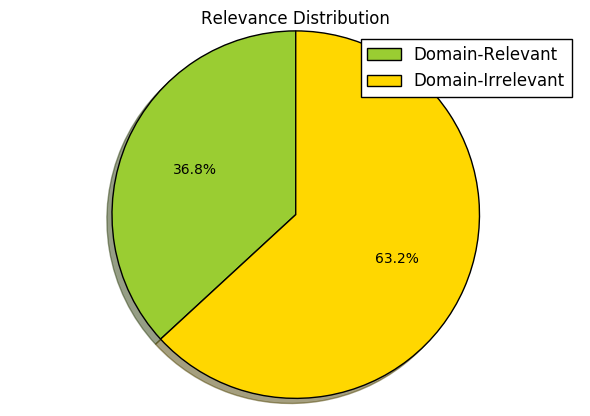

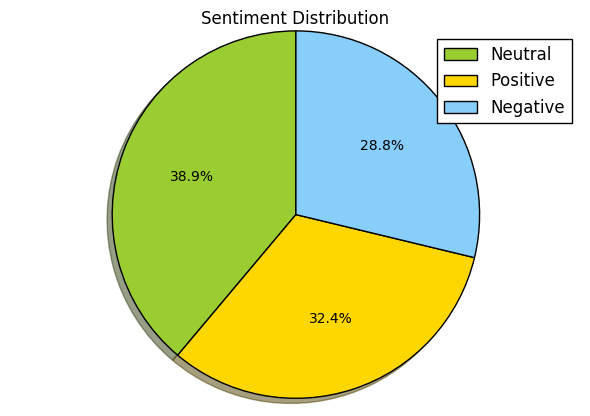

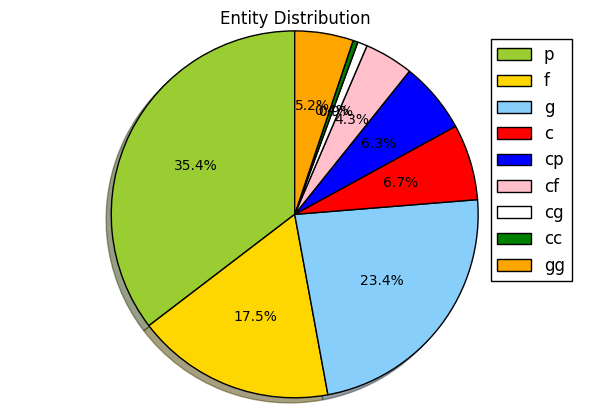

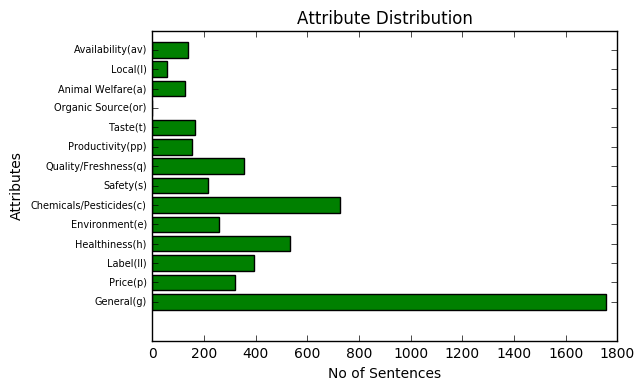

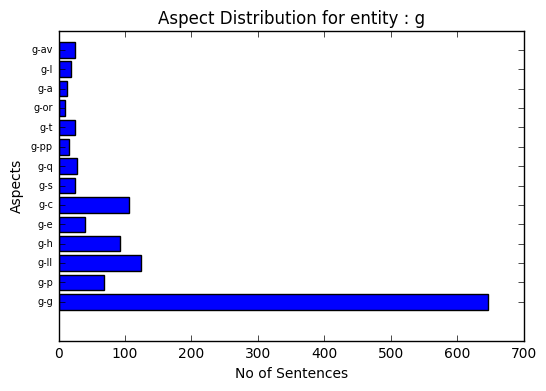

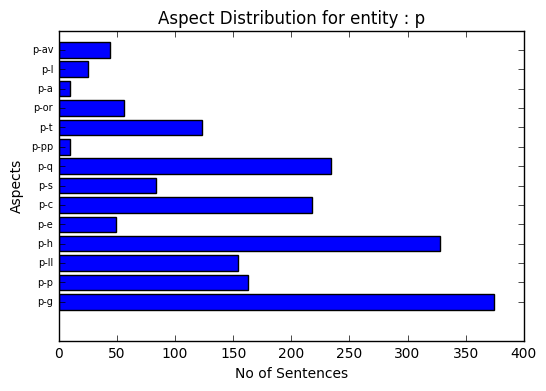

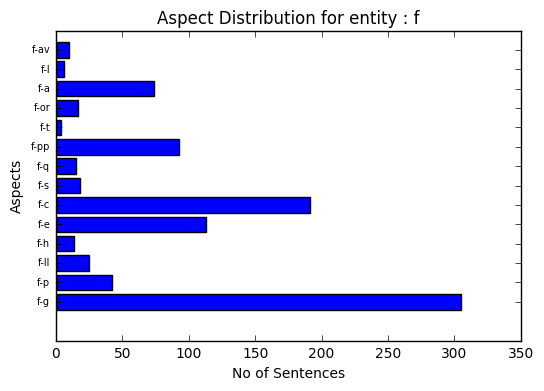

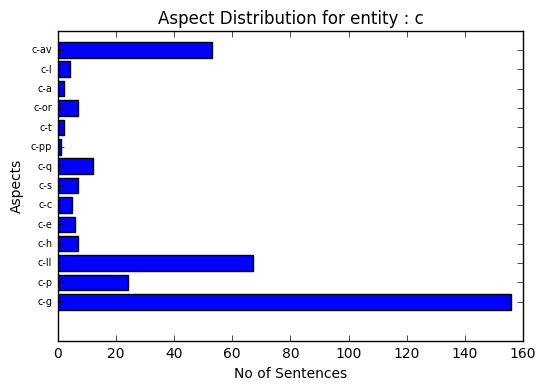

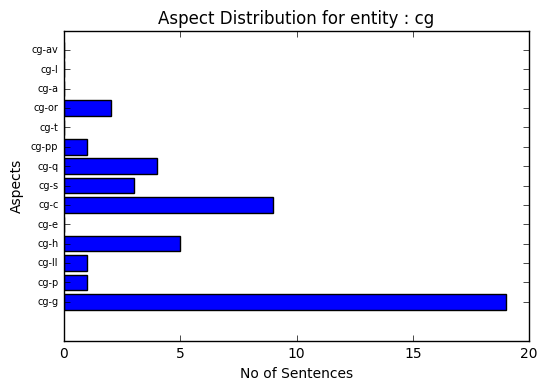

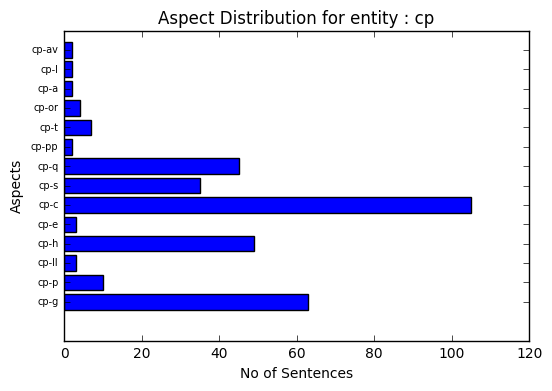

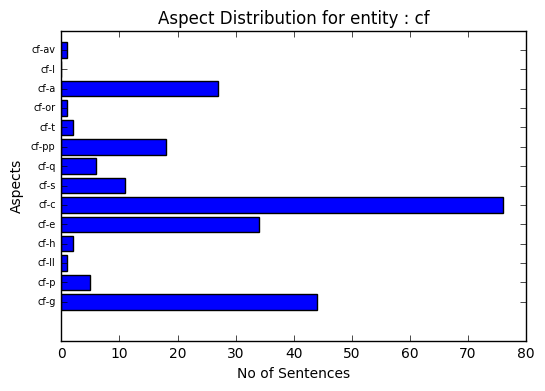

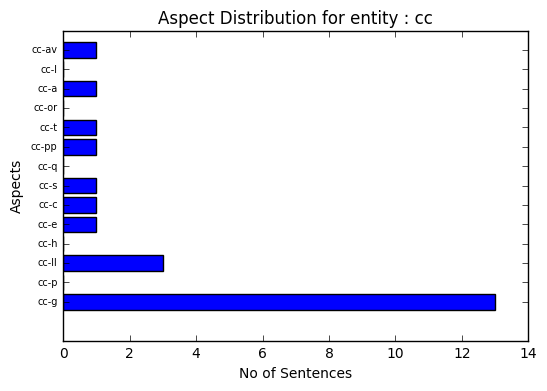

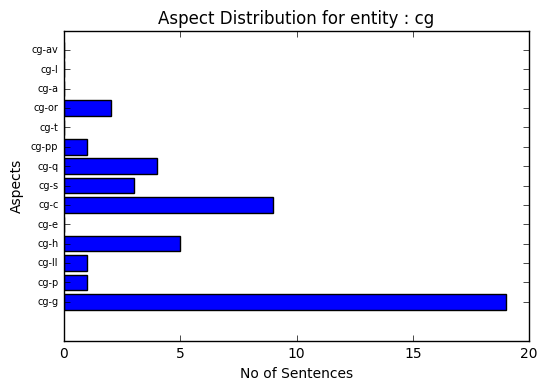

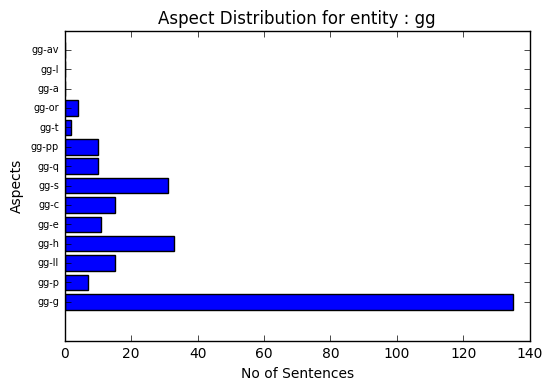

In [137]:
# Data stats before the split
generate_data_stats(all_df)

In [138]:
# Perform data split with annotators randomly distributed across the splits
train, val, test = generate_data_split_on_aspect(all_df)
print('Training : ' + str(len(train)))
print('Validation : ' + str(len(val)))
print('Testing : ' + str(len(test)))
train_df, val_df, test_df = get_df_from_data_split(train, val, test, all_df)

Number of unrelevant comments: 57
Training : 1017
Validation : 94
Testing : 101


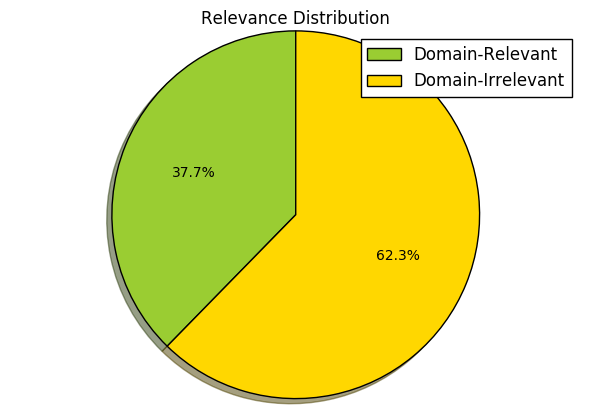

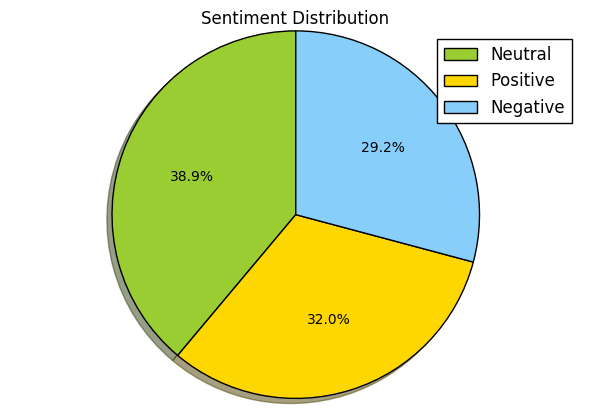

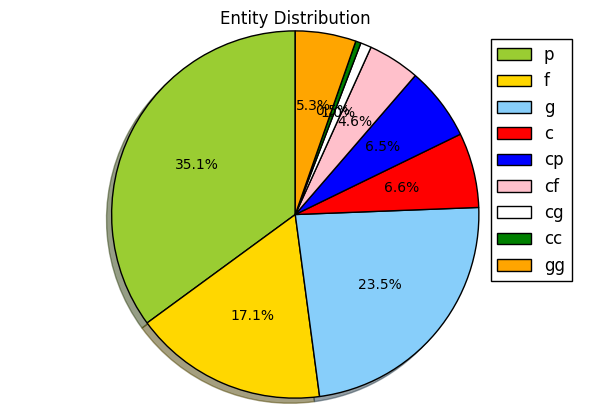

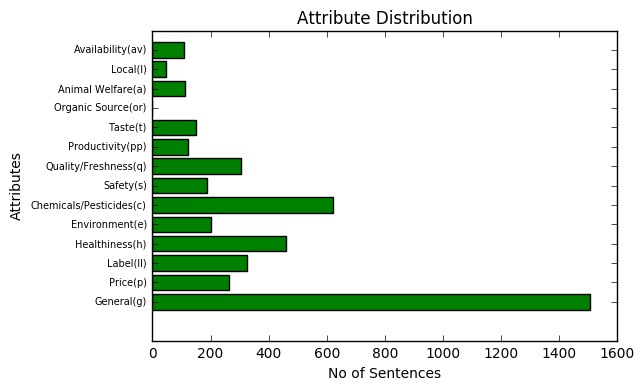

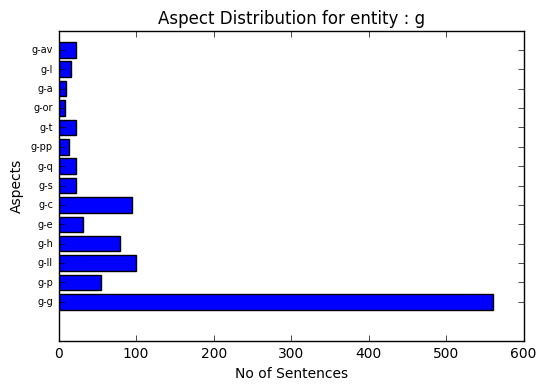

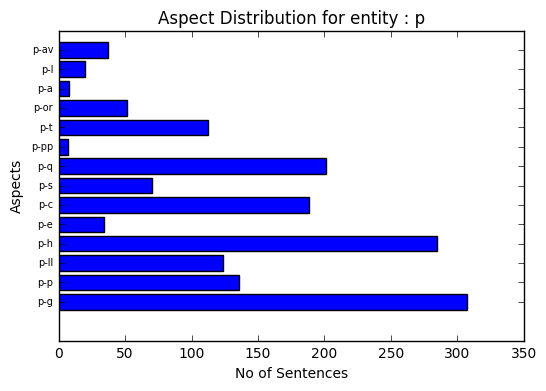

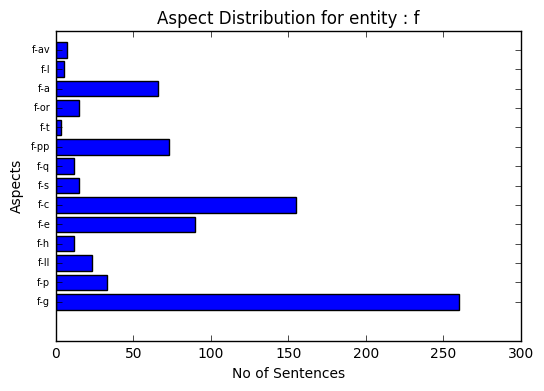

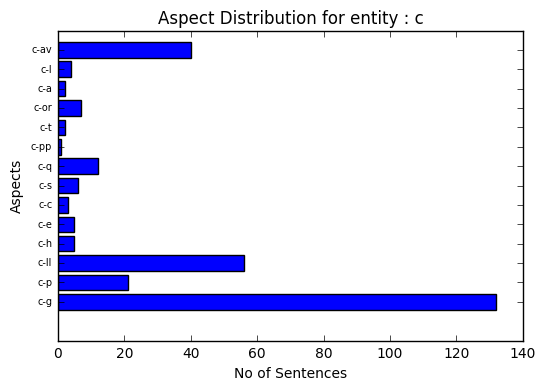

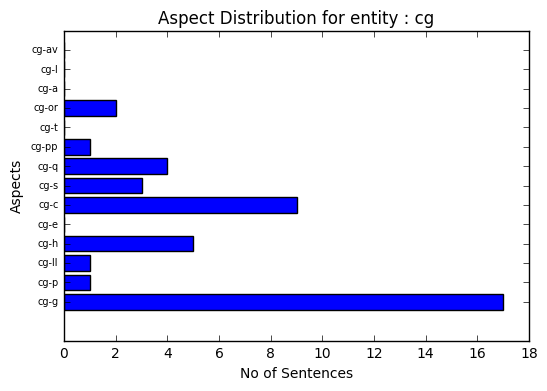

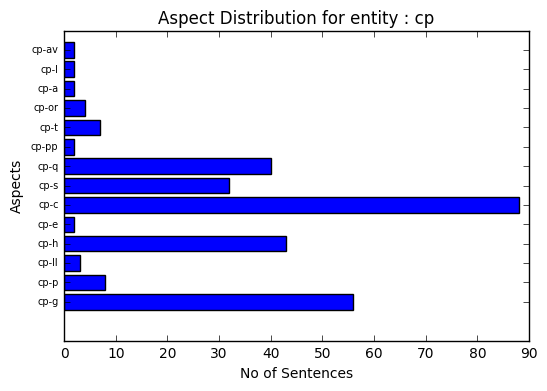

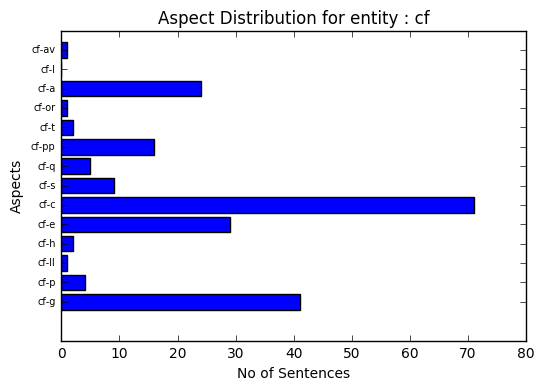

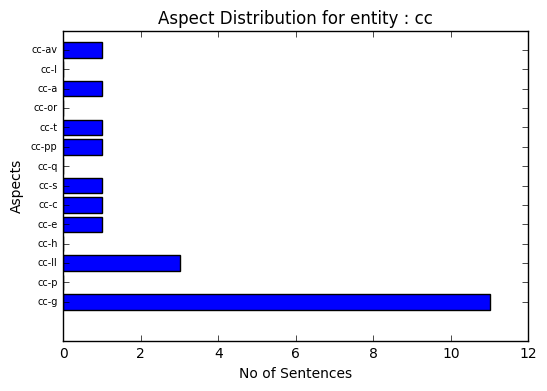

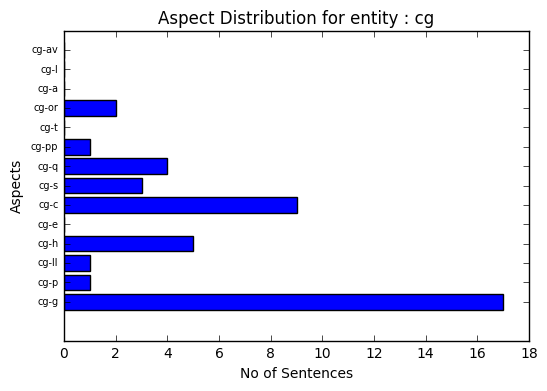

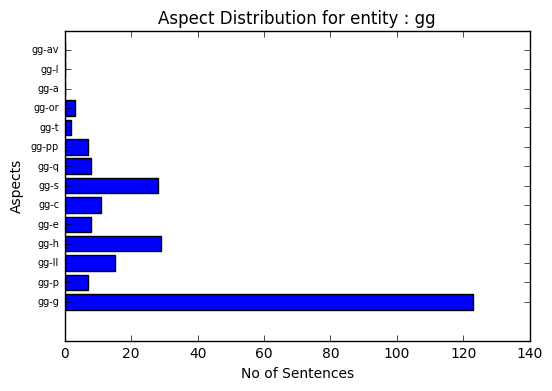

In [139]:
# Data stats after split for training set
generate_data_stats(train_df)

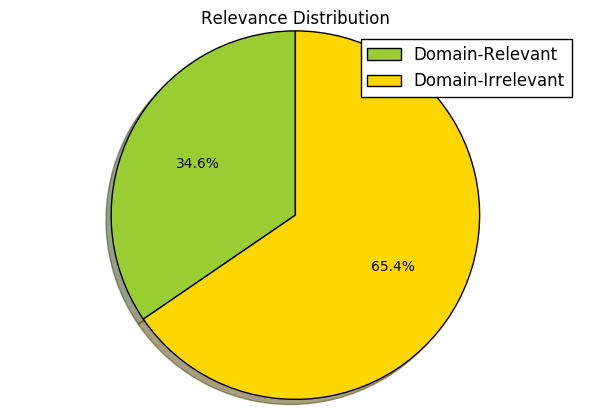

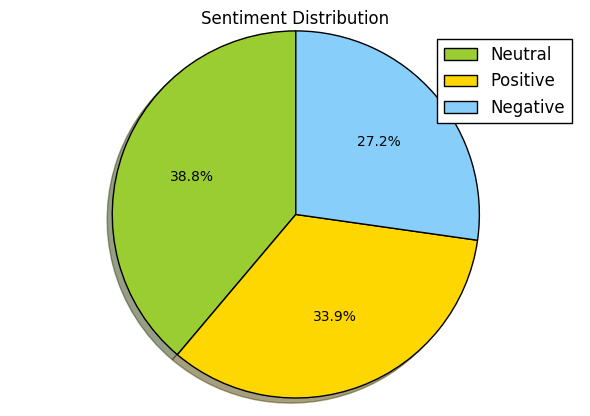

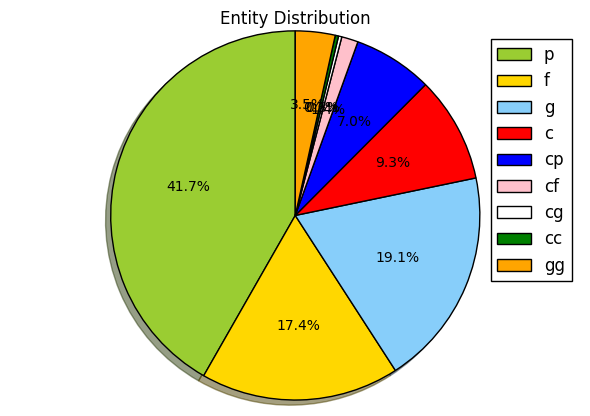

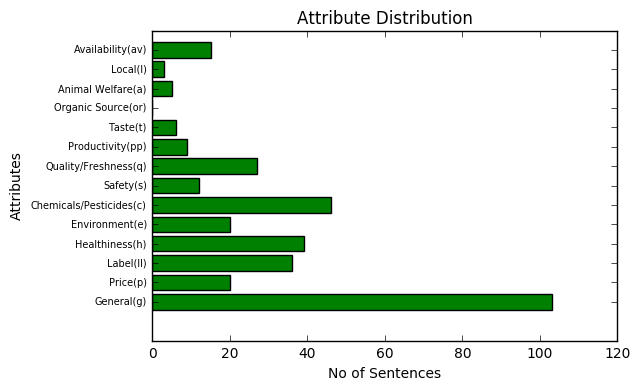

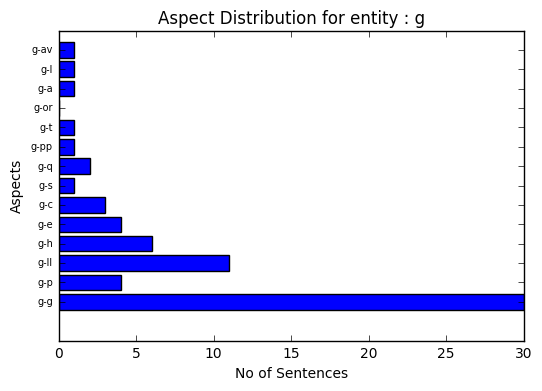

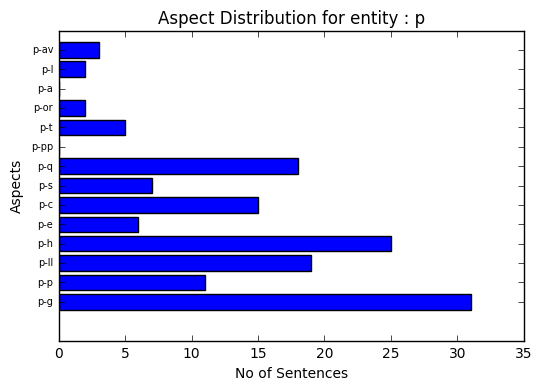

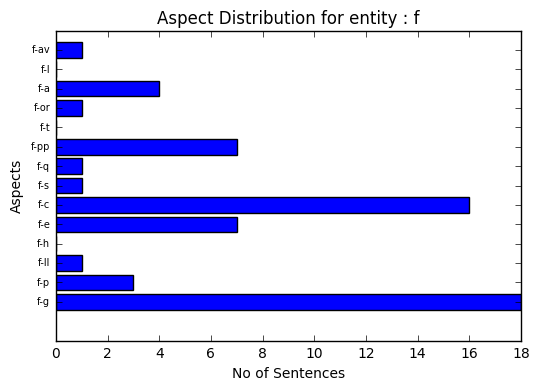

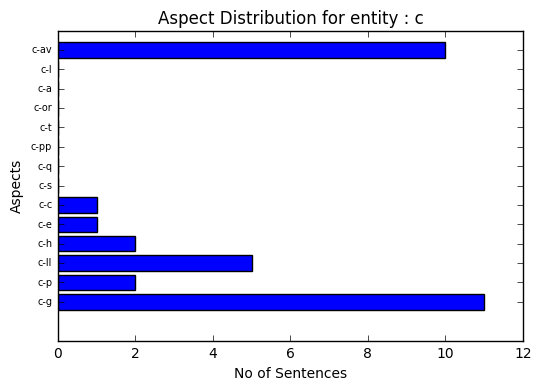

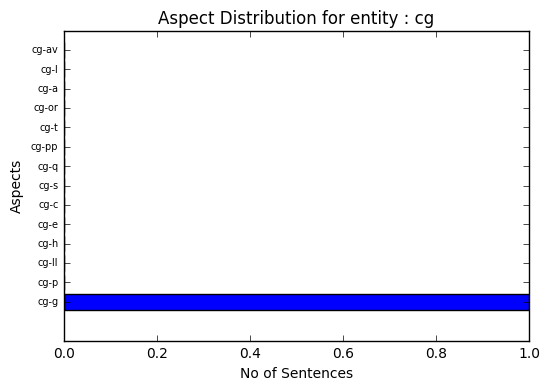

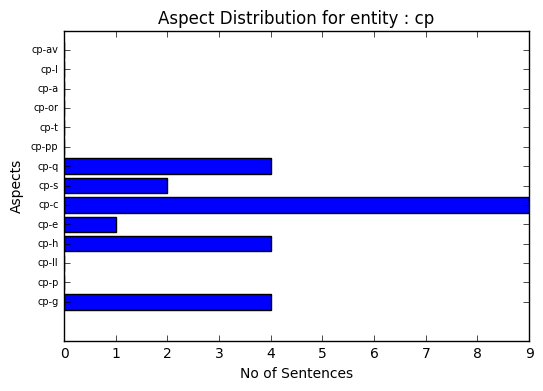

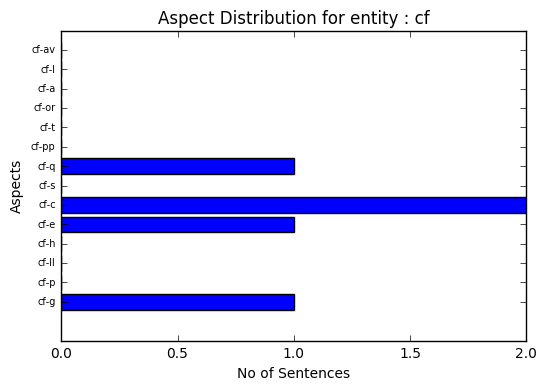

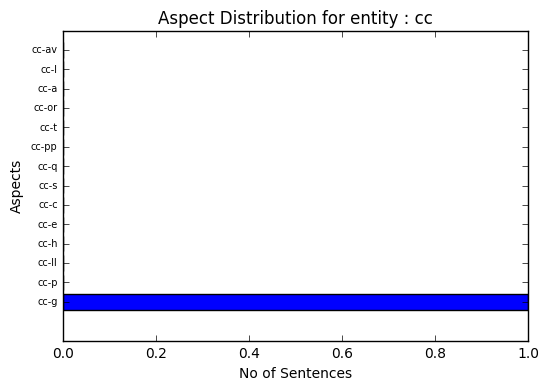

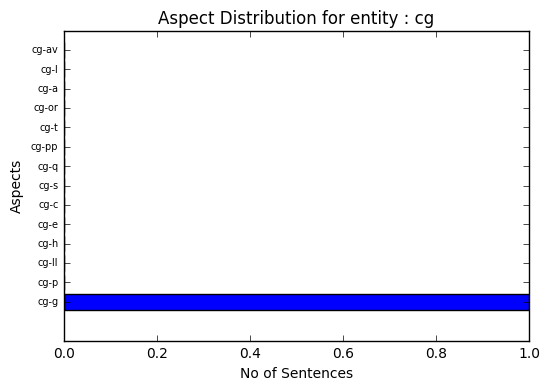

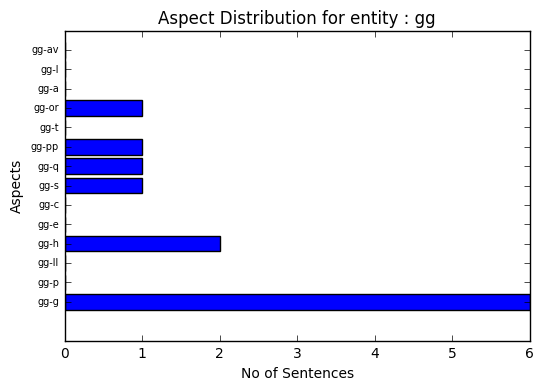

In [140]:
# Data stats after split for validation set
generate_data_stats(val_df)

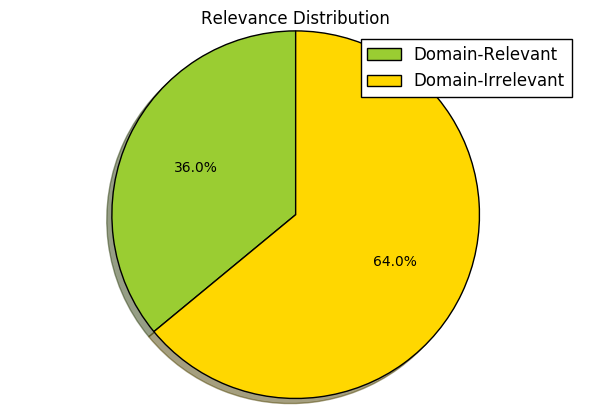

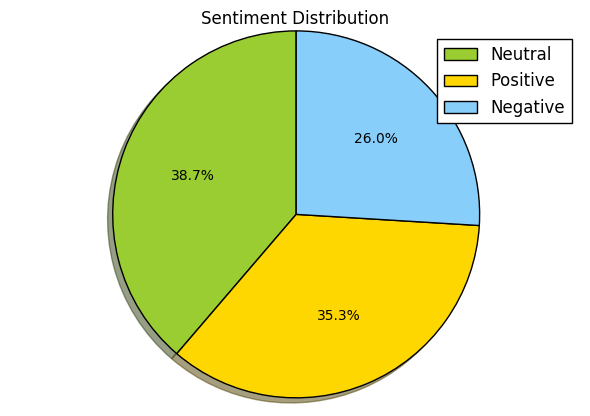

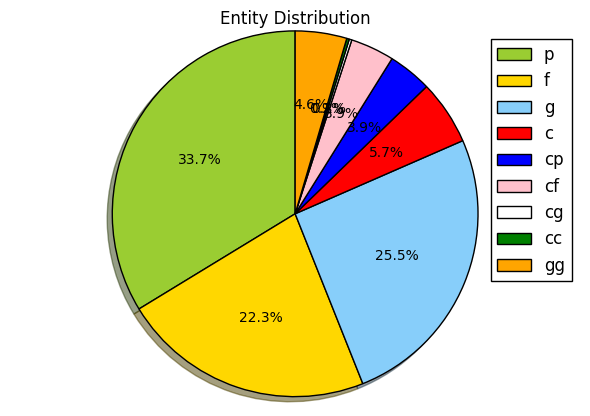

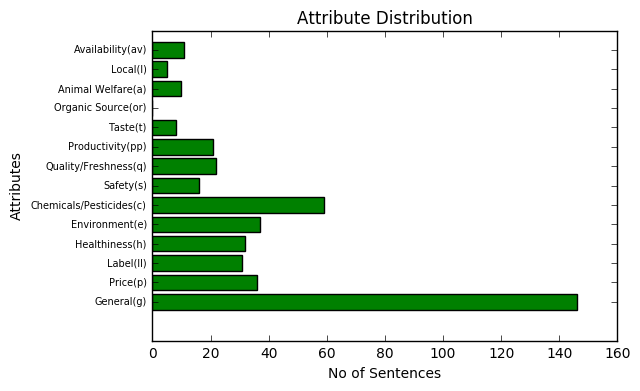

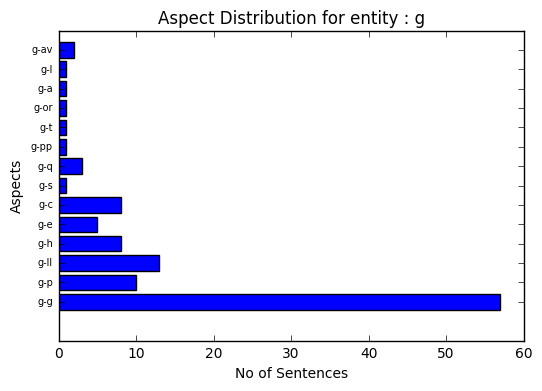

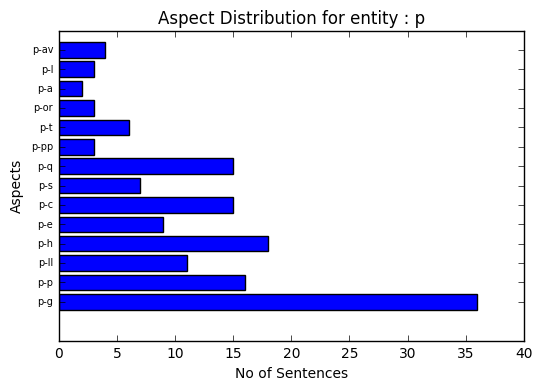

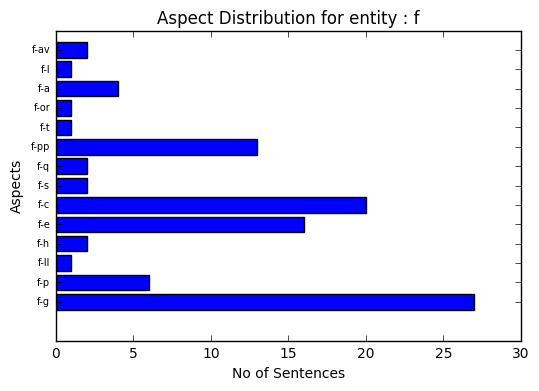

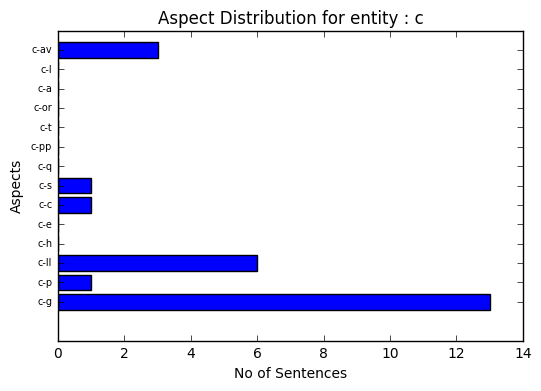

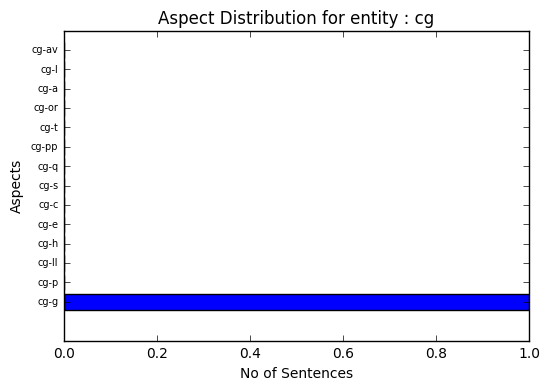

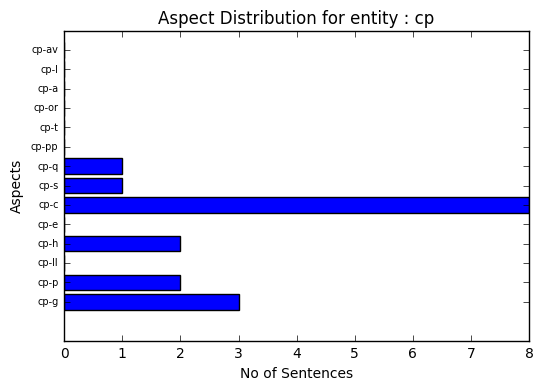

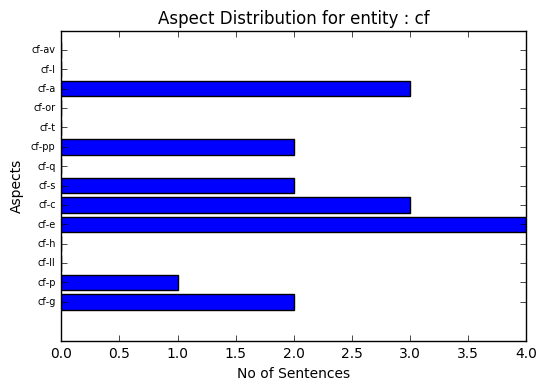

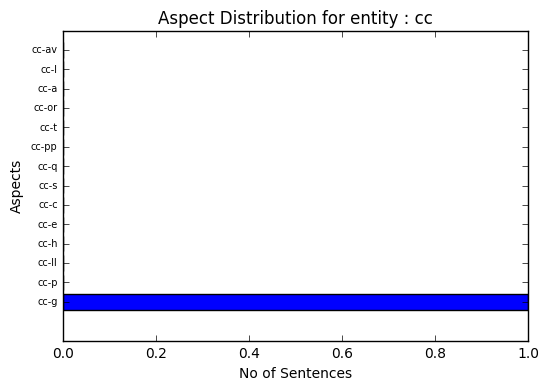

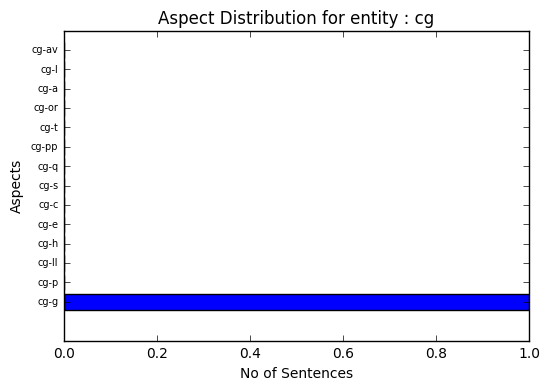

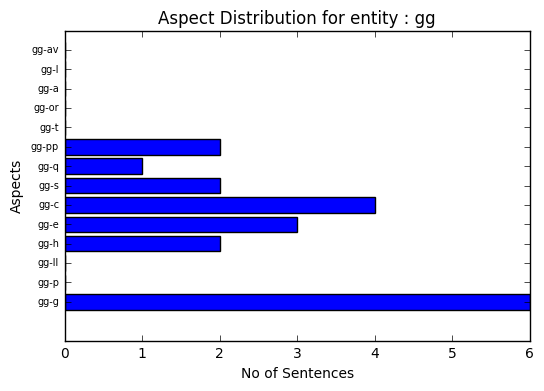

In [141]:
# Data stats after split for test set
generate_data_stats(test_df)

In [142]:
train_df.to_csv('organic_train_v1.csv', sep='|', encoding='utf-8', index=False)
val_df.to_csv('organic_val_v1.csv', sep='|', encoding='utf-8', index=False)
test_df.to_csv('organic_test_v1.csv', sep='|', encoding='utf-8', index=False)

In [143]:
# Perform data split with annotators similarly distributed across the splits
train_df_combined = []
val_df_combined = []
test_df_combined = []
for df_annotator in df_list:
    train, val, test = generate_data_split_on_aspect(df_annotator)
    print('Training : ' + str(len(train)))
    print('Validation : ' + str(len(val)))
    print('Testing : ' + str(len(test)))
    print('------')
    train_df, val_df, test_df = get_df_from_data_split(train, val, test, df_annotator)
    train_df_combined.append(train_df)
    val_df_combined.append(val_df)
    test_df_combined.append(test_df)

Number of unrelevant comments: 11
Training : 108
Validation : 19
Testing : 23
------
Number of unrelevant comments: 17
Training : 83
Validation : 16
Testing : 12
------
Number of unrelevant comments: 1
Training : 139
Validation : 10
Testing : 17
------
Number of unrelevant comments: 7
Training : 106
Validation : 18
Testing : 15
------
Number of unrelevant comments: 6
Training : 96
Validation : 19
Testing : 11
------
Number of unrelevant comments: 0
Training : 90
Validation : 16
Testing : 9
------
Number of unrelevant comments: 1
Training : 91
Validation : 20
Testing : 18
------
Number of unrelevant comments: 13
Training : 122
Validation : 15
Testing : 13
------
Number of unrelevant comments: 2
Training : 93
Validation : 18
Testing : 17
------


In [144]:
all_train_df = combine_all_dataframes(train_df_combined)
all_val_df = combine_all_dataframes(val_df_combined)
all_test_df = combine_all_dataframes(test_df_combined)

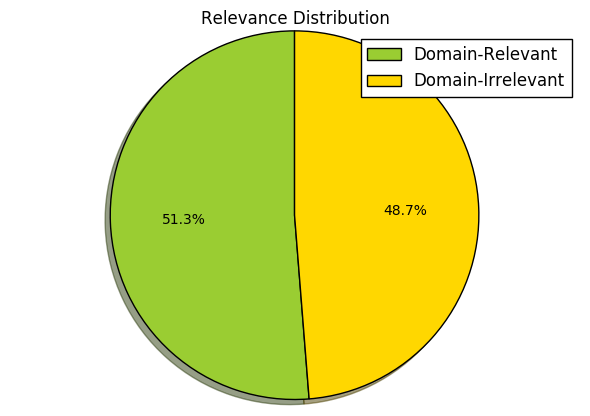

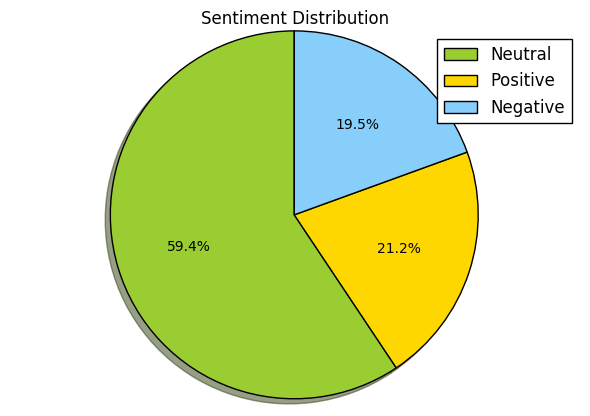

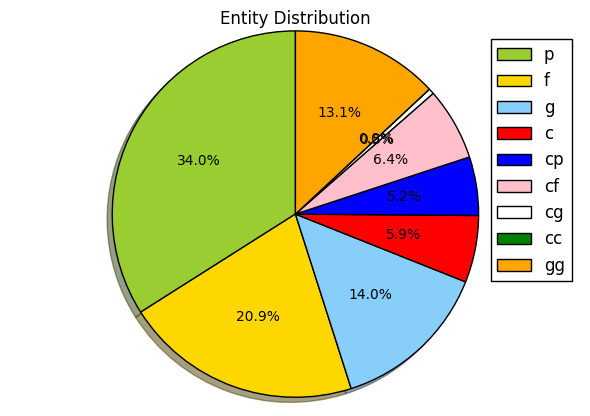

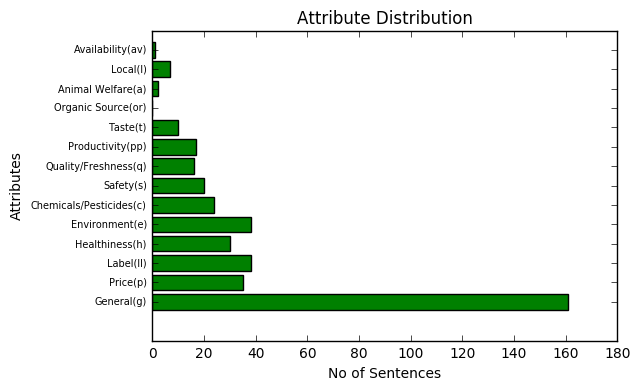

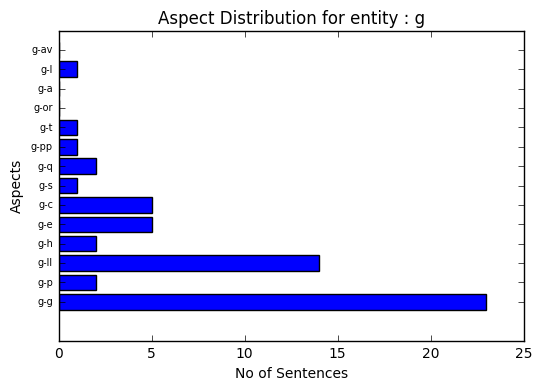

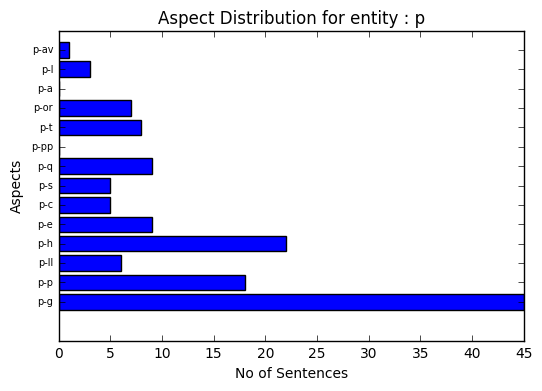

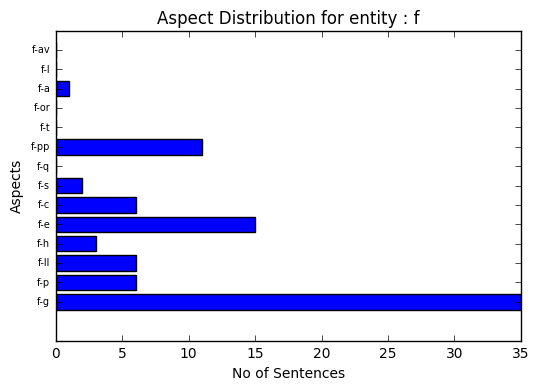

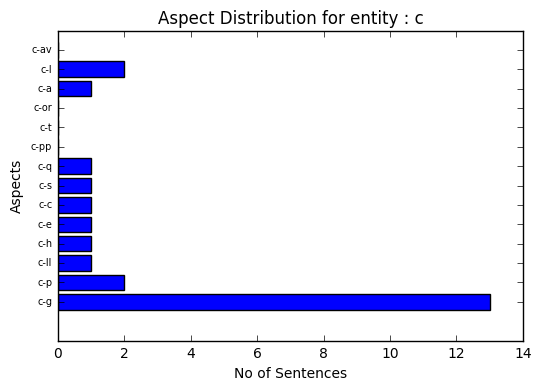

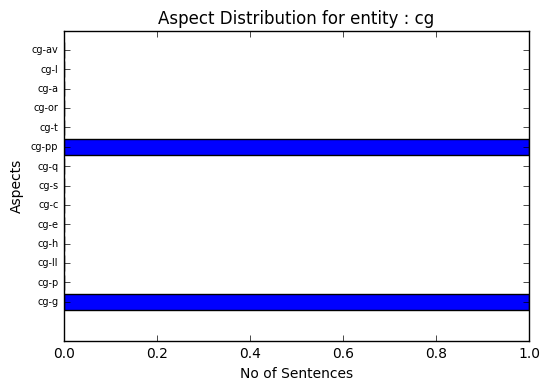

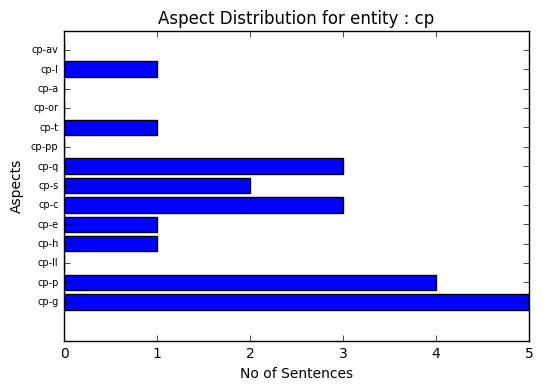

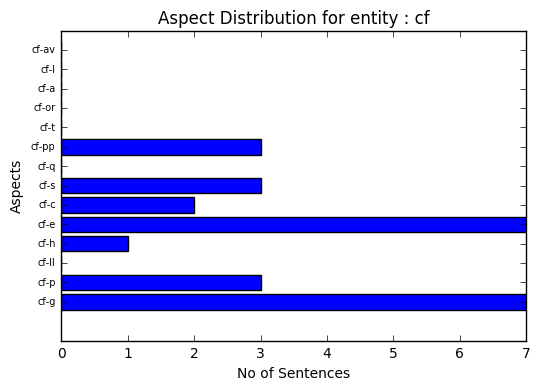

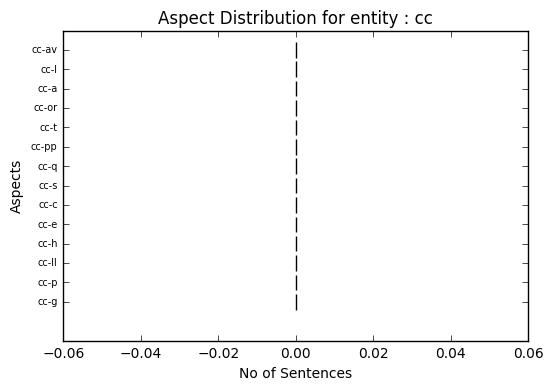

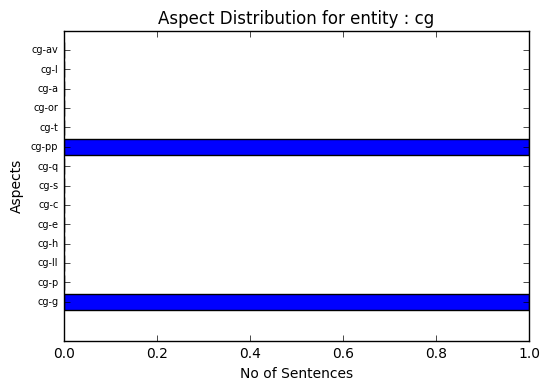

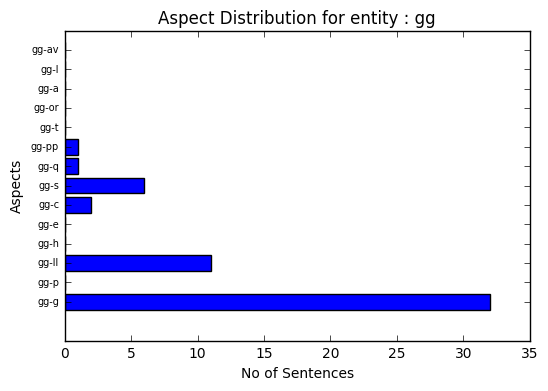

In [145]:
# Data stats after split for training set
generate_data_stats(train_df)

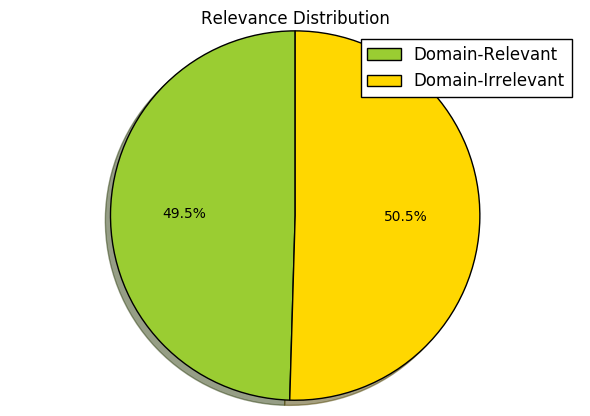

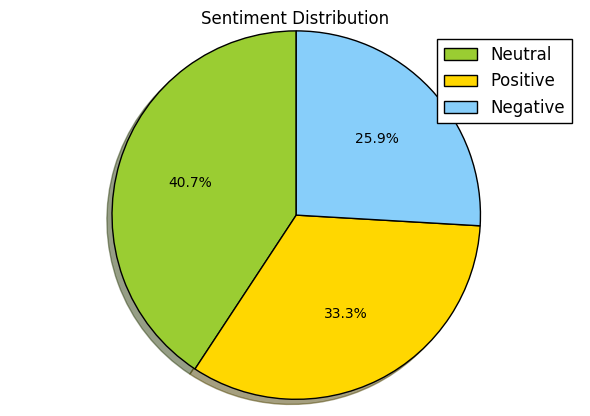

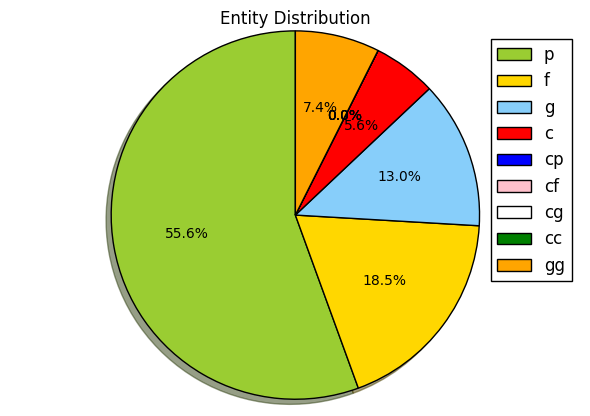

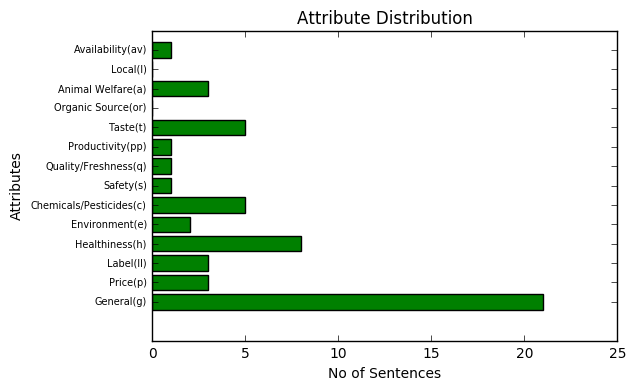

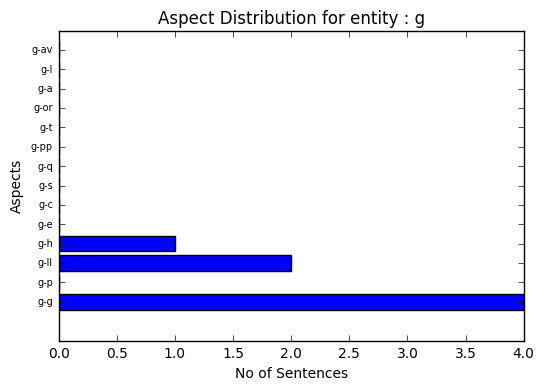

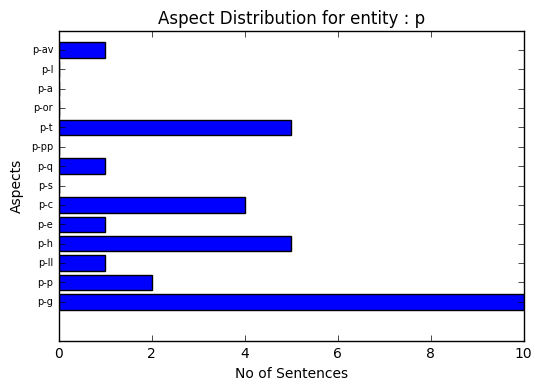

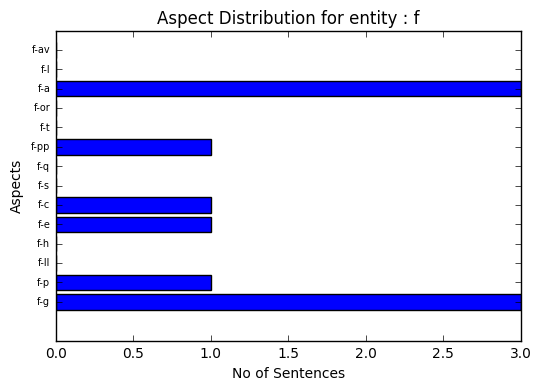

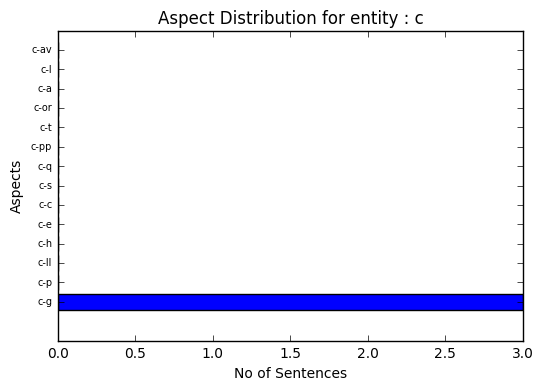

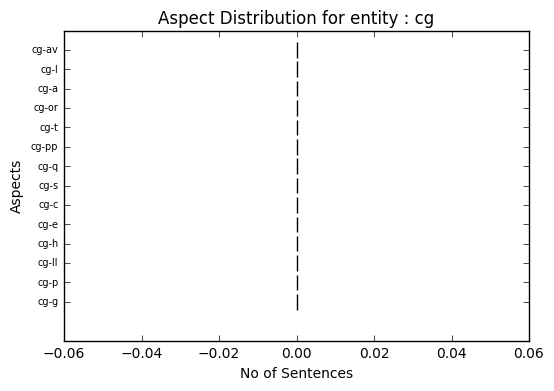

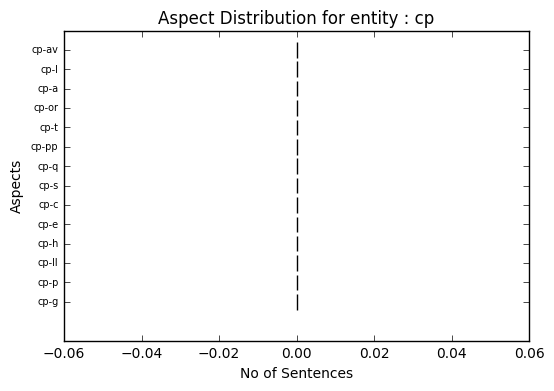

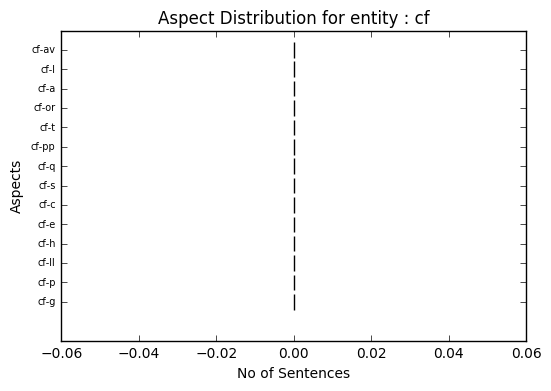

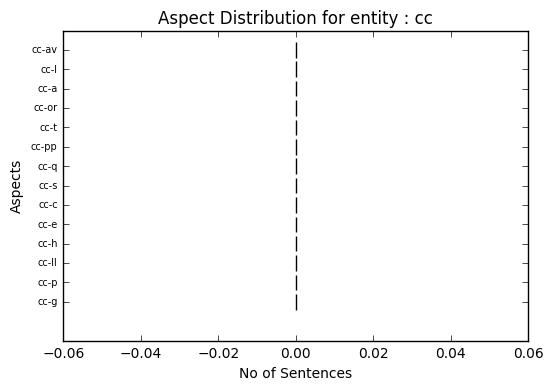

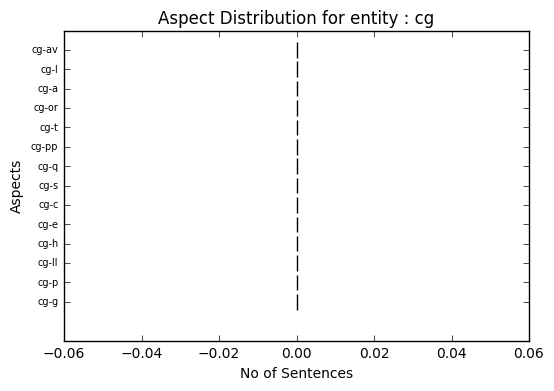

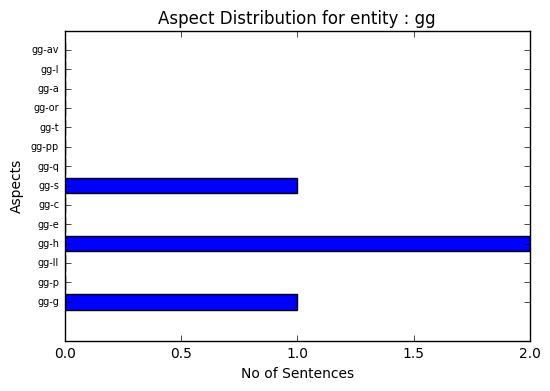

In [146]:
# Data stats after split for validation set
generate_data_stats(val_df)

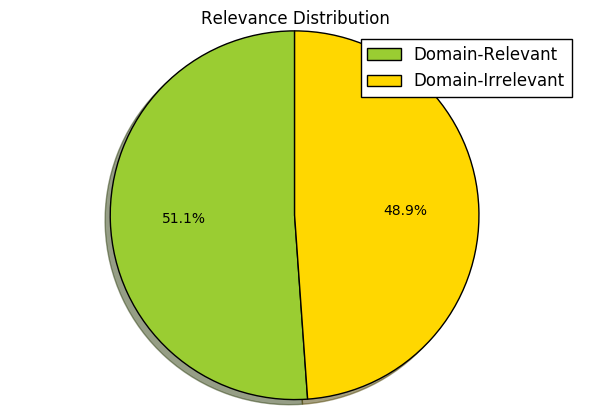

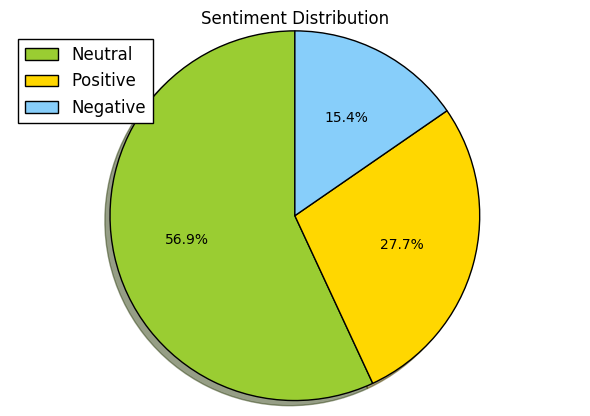

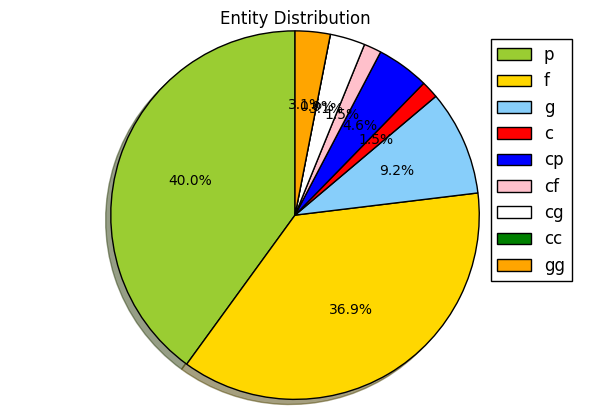

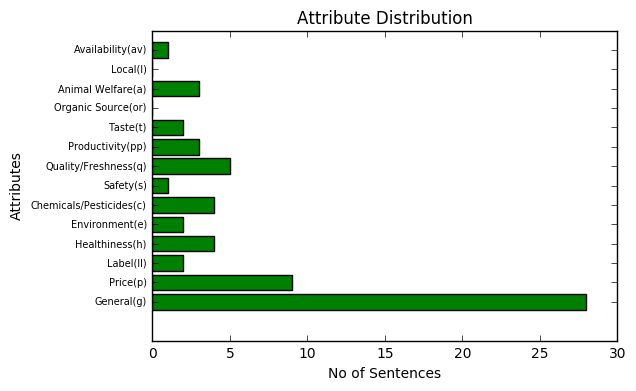

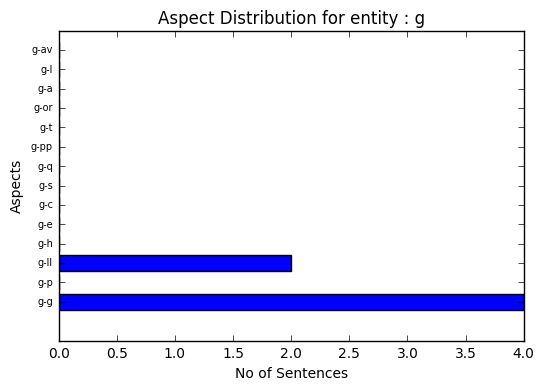

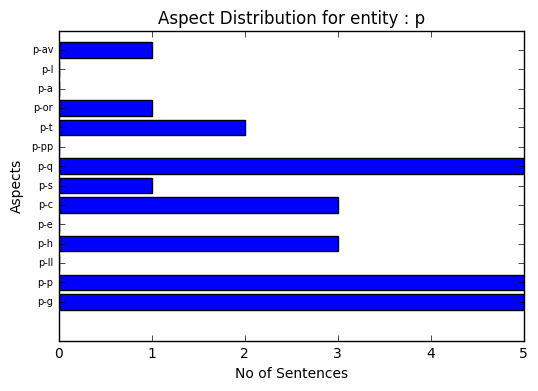

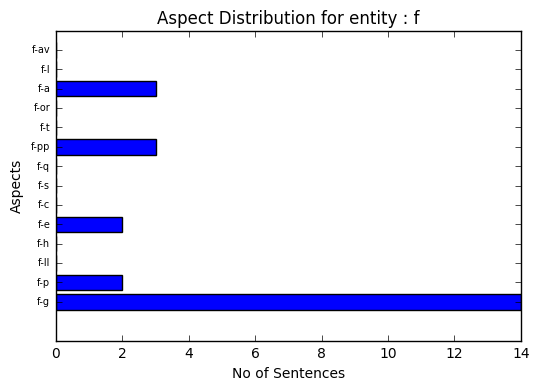

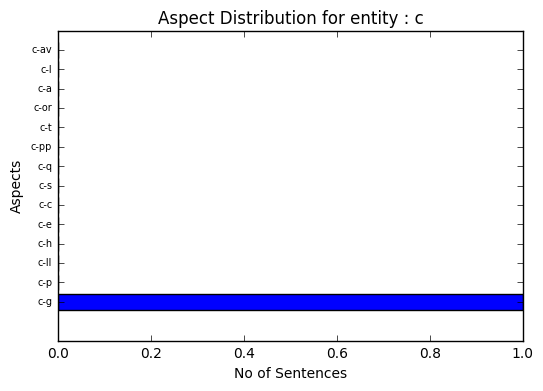

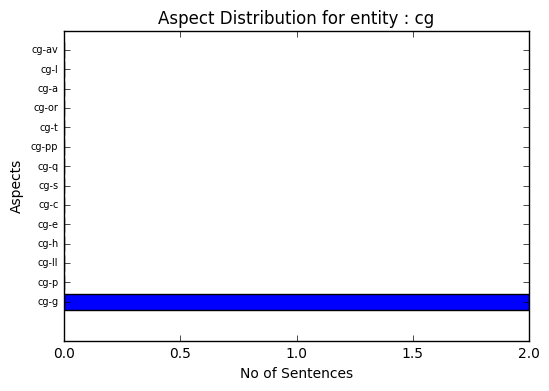

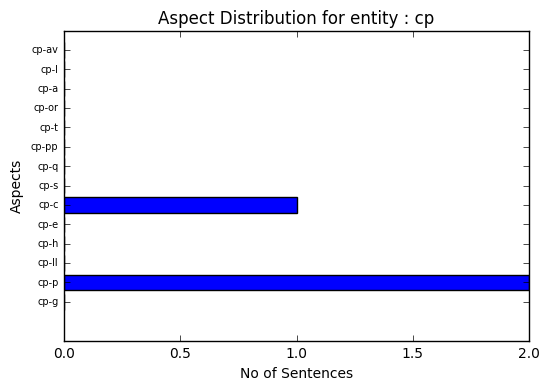

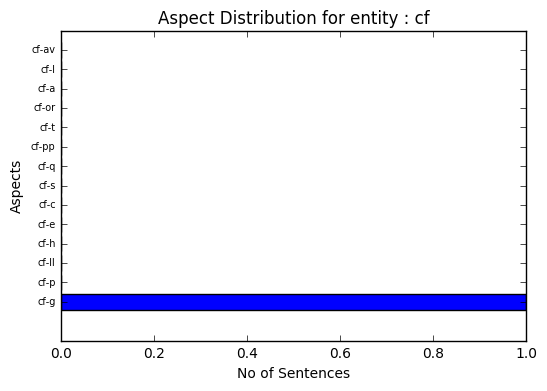

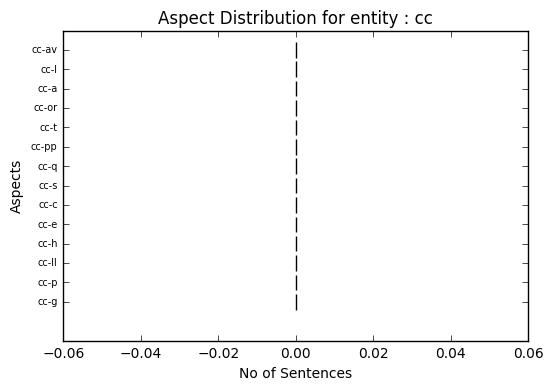

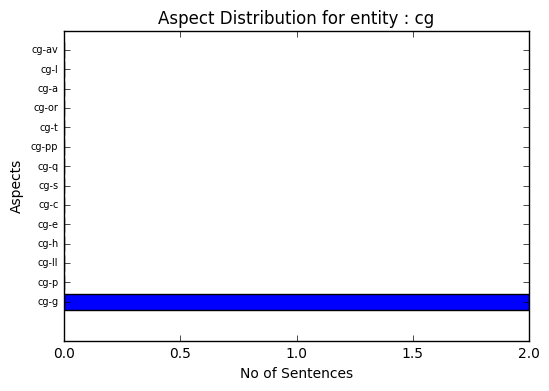

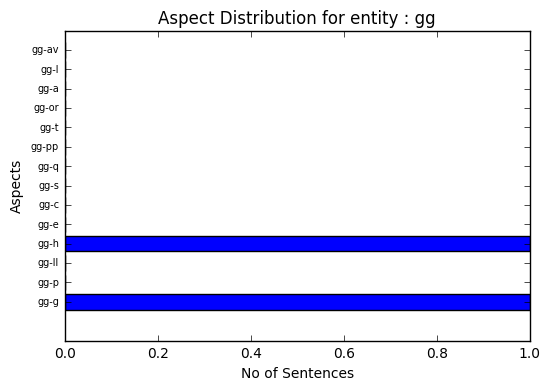

In [147]:
# Data stats after split for test set
generate_data_stats(test_df)

In [148]:
all_train_df.to_csv('organic_train_v2.csv', sep='|', encoding='utf-8', index=False)
all_val_df.to_csv('organic_val_v2.csv', sep='|', encoding='utf-8', index=False)
all_test_df.to_csv('organic_test_v2.csv', sep='|', encoding='utf-8', index=False)

In [151]:
for a in get_aspect_keys(all_df):
    print(a)

g-g
p-g
p-h
f-g
p-q
p-c
f-c
p-p
c-g
p-ll
gg-g
g-ll
p-t
f-e
g-c
cp-c
g-h
f-pp
p-s
cf-c
f-a
g-p
c-ll
cp-g
p-or
c-av
p-e
cp-h
cp-q
p-av
cf-g
f-p
g-e
cp-s
cf-e
gg-h
gg-s
g-q
cf-a
g-av
f-ll
p-l
g-s
g-t
c-p
cg-g
g-l
f-s
cf-pp
f-or
g-pp
gg-ll
f-q
gg-c
f-h
cc-g
g-a
c-q
gg-e
cf-s
p-a
f-av
p-pp
gg-q
cp-p
gg-pp
g-or
cg-c
gg-p
cp-t
c-h
c-or
c-s
c-e
f-l
cf-q
c-c
cg-h
cf-p
cg-q
cp-or
gg-or
f-t
c-l
cp-e
cc-ll
cg-s
cp-ll
cp-av
gg-t
cg-or
c-a
cp-a
c-t
cp-l
cf-t
cf-h
cp-pp
cc-pp
cc-s
g-n
cg-p
cc-a
cg-ll
cc-t
cc-e
cc-av
cf-or
cf-av
cg-pp
cf-ll
c-pp
cc-c
